### Liberaries

In [83]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  , PolynomialFeatures
from sklearn.linear_model import LinearRegression ,Lasso , Ridge
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

### Convert data to datafame

In [40]:
data = fetch_california_housing(as_frame=True)
df = data.frame

### Data Cleaning

In [41]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [43]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [44]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [45]:
df.duplicated().sum()

np.int64(0)

### EDA 

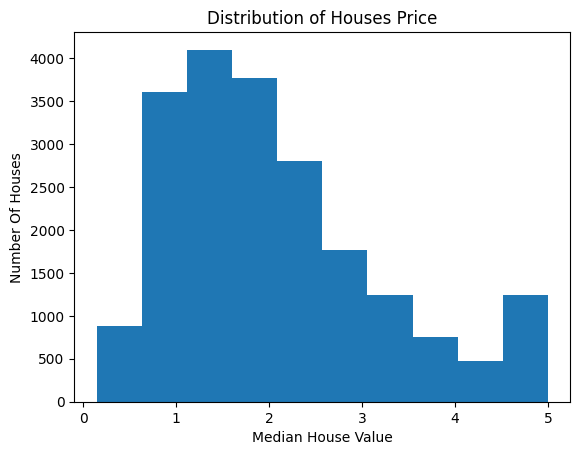

In [46]:
plt.hist(df['MedHouseVal'])
plt.xlabel('Median House Value')
plt.ylabel('Number Of Houses')
plt.title('Distribution of Houses Price')
plt.show()

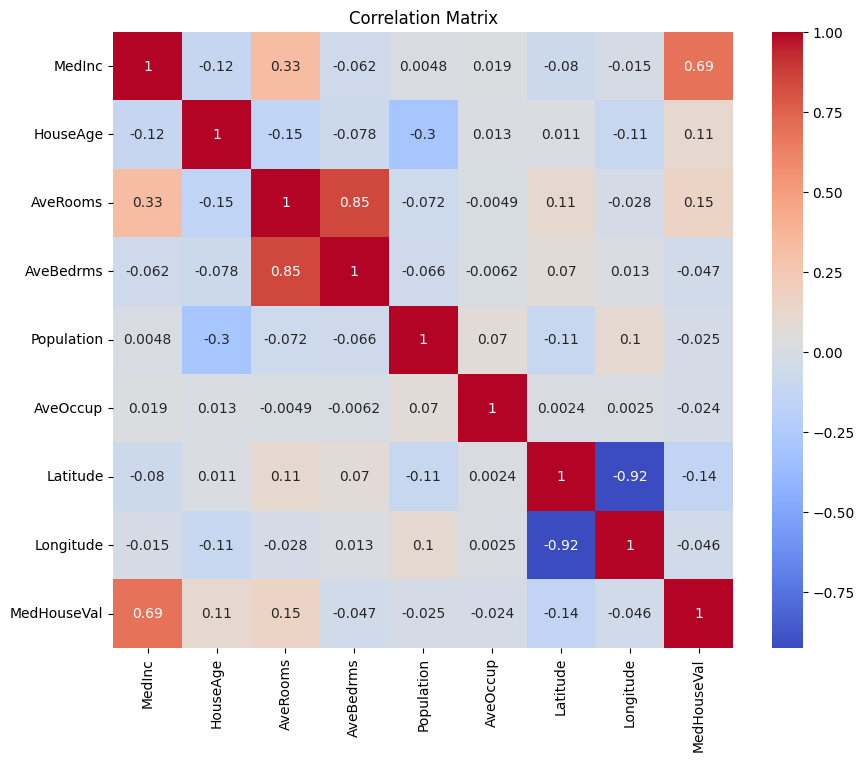

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr() , annot= True , cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Best Relations between -> (Latitude , Longitude) , (AveRooms , AveBedrms)
# Strong Feature -> MedInc

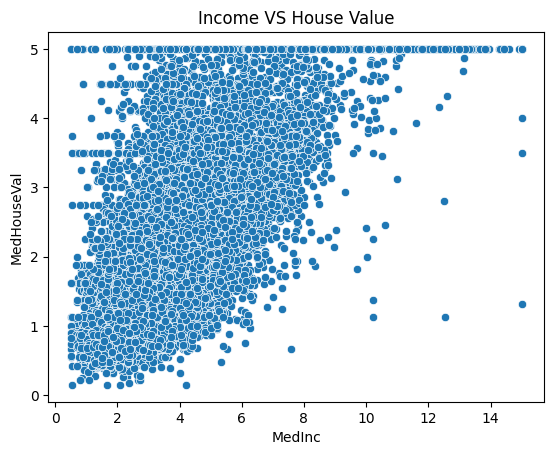

In [70]:
sns.scatterplot(x='MedInc' , y = 'MedHouseVal' , data = df)
plt.title('Income VS House Value')
plt.show()

### Data Modeling & Linear Regression

In [59]:
x= df.drop('MedHouseVal', axis=1)
y= df['MedHouseVal']

### Train & Test

In [71]:
x_train , x_test , y_train , y_test = train_test_split(x , y , train_size= 0.8 , random_state=20)

### Scaling

In [72]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Linera Regression

In [73]:
model = LinearRegression()
model.fit(x_train , y_train)
y_train_pred =model.predict(x_train)
y_test_pred = model.predict(x_test)

### MAE , MSE , R2_Score

In [74]:
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R2 Score:", r2_score(y_train, y_train_pred))

MAE: 0.5294357036002267
RMSE: 0.7216515999034232
R2 Score: 0.6041796268622668


In [75]:
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R2 Score:", r2_score(y_test, y_test_pred))

MAE: 0.5409622217186032
RMSE: 0.7355308130245343
R2 Score: 0.6121654293404897


### Features Effect

In [69]:
coef_df = pd.DataFrame({
    "Feature": x.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

coef_df

,Feature,Coefficient
0,MedInc,0.827765
3,AveBedrms,0.302556
1,HouseAge,0.118923
4,Population,-0.008340
5,AveOccup,-0.040360
2,AveRooms,-0.274502
7,Longitude,-0.851404
6,Latitude,-0.882431


### L1 (Lasso)

In [78]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train , y_train)
y_train_pred_lasso = lasso.predict(x_train)
y_test_pred_lasso = lasso.predict(x_test)

In [79]:
print("MAE:", mean_absolute_error(y_train, y_train_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_lasso)))
print("R2 Score:", r2_score(y_train, y_train_pred_lasso))

MAE: 0.5329258275646449
RMSE: 0.7252861455756419
R2 Score: 0.6001825457363502


In [80]:
print("MAE:", mean_absolute_error(y_test, y_test_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_lasso)))
print("R2 Score:", r2_score(y_test, y_test_pred_lasso))

MAE: 0.5447187699007332
RMSE: 0.7388882174522297
R2 Score: 0.6086167287154711


### Polynomial Features

In [120]:
poly = PolynomialFeatures(degree= 2 , include_bias= False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

### Ridge Regression

In [121]:
ridge = Ridge(alpha=1)
ridge.fit(x_train_poly, y_train)

,alpha,1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [122]:
y_train_pred = ridge.predict(x_train_poly)
y_test_pred = ridge.predict(x_test_poly)

In [123]:
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("R2 Score:", r2_score(y_train, y_train_pred))

MAE: 0.45965902492510546
MSE: 0.418053132012006
R2 Score: 0.682258114927331


In [124]:
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("R2 Score:", r2_score(y_test, y_test_pred))

MAE: 0.4655048735898101
MSE: 0.4570839563087318
R2 Score: 0.6723269268990939
